In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler    #for normalization

In [0]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df_train.iloc[:,1:2].values

In [0]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [6]:
train_set_scaled.shape

(1258, 1)

In [0]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(train_set_scaled[i-60:i,0])
  y_train.append(train_set_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [0]:
 regressor = Sequential()

In [0]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))    #output layer

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')    #most preferred optimizers for RNN's are adam ansd RMSprop

In [0]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 37s 31ms/step - loss: 0.0575
Epoch 2/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0080
Epoch 3/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0077
Epoch 4/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0066
Epoch 5/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0063
Epoch 6/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0059
Epoch 7/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0067
Epoch 8/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0054
Epoch 10/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0060
Epoch 11/100
1198/1198 [=============

In [0]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:,1:2].values

In [0]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

In [11]:
X_test.shape

(20, 60)

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)   #to tranform scaled values back to their original values

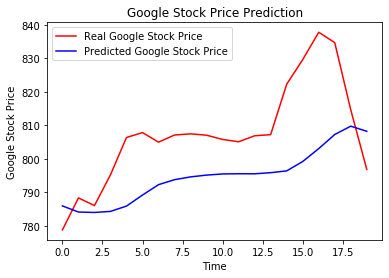

In [0]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
from keras.models import load_model
regressor.save('stock_prediction.h5')

In [0]:
model = load_model('stock_prediction.h5')

/bin/bash: google-drive-ocamlfuse: command not found
